In [1]:
#Paso 1. Abre el archivo de datos y estudia la información general 
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo = '/datasets/games.csv'
datos_juegos = pd.read_csv(ruta_archivo)

print(datos_juegos.head())
print(datos_juegos.info())
print(datos_juegos.describe())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

# **Paso 2:Prepara los datos**

In [2]:
# Reemplazar los nombres de las columnas a minúsculas
datos_juegos.columns = datos_juegos.columns.str.lower()
print(datos_juegos.columns)

print(datos_juegos == 'TBD')
# No Exite ningun valor TBD

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
        name  platform  year_of_release  genre  na_sales  eu_sales  jp_sales  \
0      False     False            False  False     False     False     False   
1      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
4      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16710  False     False            False  False     False     False     False   
16711  False     False            False  False     False     False     False   
16712  False     False            False  False     False     False     False   
16713  False     False  

In [3]:
# Convertir 'year_of_release' a entero (int), ignorando nulos
datos_juegos['year_of_release'] = pd.to_numeric(datos_juegos['year_of_release'], errors='coerce').astype('Int64')
datos_juegos['critic_score'] = pd.to_numeric(datos_juegos['critic_score'], errors='coerce').astype('Int64')
datos_juegos['user_score'] = pd.to_numeric(datos_juegos['user_score'], errors='coerce')
print(datos_juegos.dtypes)


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object


Las columnas en que los tipos de datos fueron cambiados son: year_of_release que antes estaba en tipo float pero no es necesario y se puede confundir esto debido a que no se pueden tener decimales en los años, este mismo caso se apicaco a critic_score ya que analizando los datos no hay ningun numero que tenga decimales en esta variable.
La otra columna que se modicio fue "User_Score" la cual venia como objetc y dado que son numero que después se puedo usar para calculos se cambio a tipo float64

In [4]:
#Manejo de valores ausentes.
# Revisar los valores nulos en cada columna
valores_nulos = datos_juegos.isnull().sum()
print(valores_nulos)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [7]:
critic_score_median = datos_juegos['critic_score'].median()
user_score_median = datos_juegos['user_score'].median()

datos_juegos['critic_score'].fillna(critic_score_median, inplace=True)
datos_juegos['user_score'].fillna(user_score_median, inplace=True)

valores_nulos = datos_juegos.isnull().sum()
print(valores_nulos)


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
total_sales           0
dtype: int64


Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco. Los valores ausentes se dicieron dejar así  debido a que rellenarlos con la media pueden causar un sesgo de información al igual que si eliminas ya que son valores de cristica, por lo que una vez se analice estos valores en concreto se eliminaran para que no afecten a los demás valores. sibre todo por que es una gran numero de datos para las columnas critic_score y user_score.
¿Por qué crees que los valores están ausentes? Los valores estan ausentes debido a que no se cuenta con la información necesaria 
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
    No tengo ningun valor TBD

In [8]:
#Ventas totales
datos_juegos['total_sales'] = datos_juegos['na_sales'] + datos_juegos['eu_sales'] + datos_juegos['jp_sales'] + datos_juegos['other_sales']
print(datos_juegos[['name', 'total_sales']].head())


                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


# **Paso 3. Analiza los datos**

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


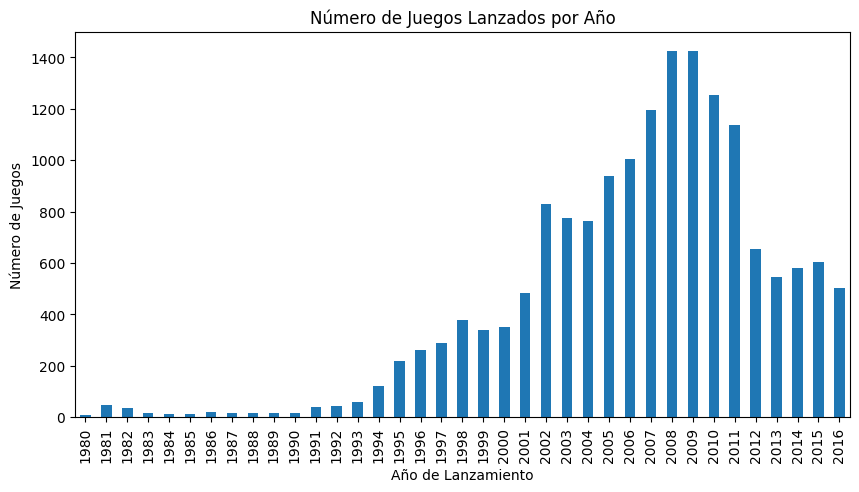

In [9]:
# Lazamientos por año
lanzamientos_por_ano = datos_juegos['year_of_release'].value_counts().sort_index()

print(lanzamientos_por_ano)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
lanzamientos_por_ano.plot(kind='bar')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.show()


In [10]:
# Calcular las ventas totales por plataforma
ventas_por_plataforma = datos_juegos.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(ventas_por_plataforma)
plataformas_principales = ventas_por_plataforma.head(5).index
print(f"Plataformas principales: {plataformas_principales}")


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Plataformas principales: Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


Las plataformas con mayores ventas son 'PS2', 'X360', 'PS3', 'Wii', 'DS'.

<Figure size 1400x700 with 0 Axes>

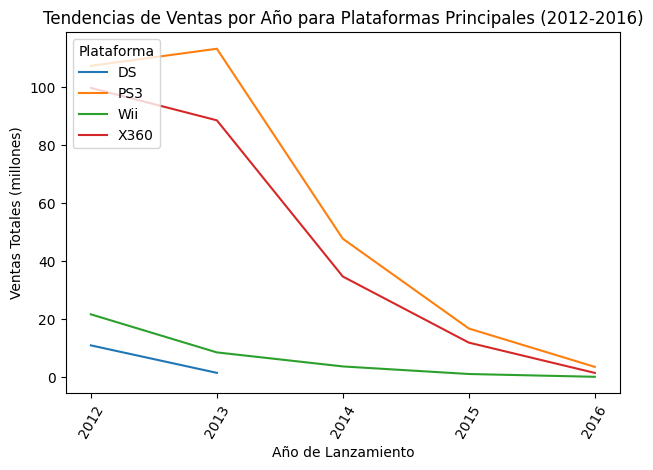

In [11]:
import matplotlib.pyplot as plt

# Seleccionar los últimos 5 años del dataset
anio_inicio = 2012
anio_fin = 2016

# Filtrar los datos para los años de interés
datos_recientes = datos_juegos[(datos_juegos['year_of_release'] >= anio_inicio) & 
                               (datos_juegos['year_of_release'] <= anio_fin)]

plataformas_principales = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
datos_principales_plataformas = datos_recientes[datos_recientes['platform'].isin(plataformas_principales)]

ventas_por_ano_plataforma = datos_principales_plataformas.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

plt.figure(figsize=(14, 7))
ventas_por_ano_plataforma.plot()

plt.xticks(range(anio_inicio, anio_fin + 1), rotation=60, fontsize=10)
plt.title('Tendencias de Ventas por Año para Plataformas Principales (2012-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma', loc='upper left')
plt.tight_layout()
plt.show()


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64
Plataformas potencialmente rentables: Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')


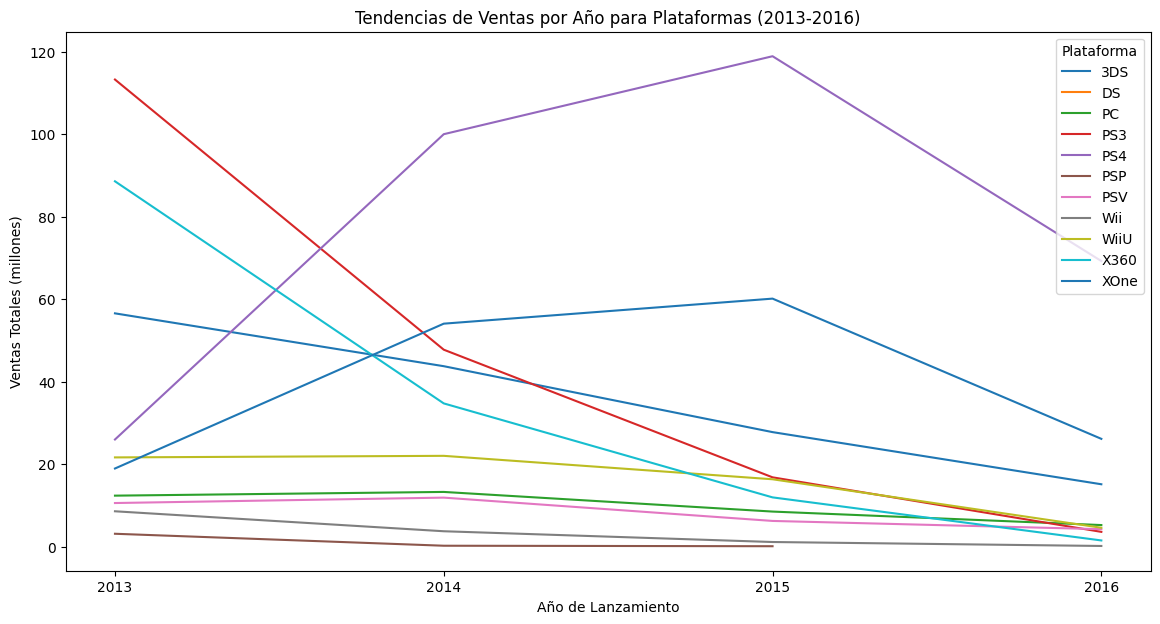

In [10]:
datos_relevantes = datos_juegos[(datos_juegos['year_of_release'] >= 2013) & (datos_juegos['year_of_release'] <= 2016)]

ventas_totales_relevantes = datos_relevantes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_totales_relevantes)
plataformas_rentables = ventas_totales_relevantes.head(5).index
print(f"Plataformas potencialmente rentables: {plataformas_rentables}")



ventas_por_ano_plataforma = datos_relevantes.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

plt.figure(figsize=(14, 7))
ventas_por_ano_plataforma.plot(ax=plt.gca())
plt.title('Tendencias de Ventas por Año para Plataformas (2013-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma', loc='upper right')


plt.xticks(ticks=range(2013, 2017), labels=range(2013, 2017), rotation=0)
plt.show()




Todas las plataformas con mayor cantidad de ventas  tienen un tendencia desencdente aunque hay unas que se estan mas estables que otras como es el caso de Xone y PC las cuales tienen un ligero crecimiento

<Figure size 1200x600 with 0 Axes>

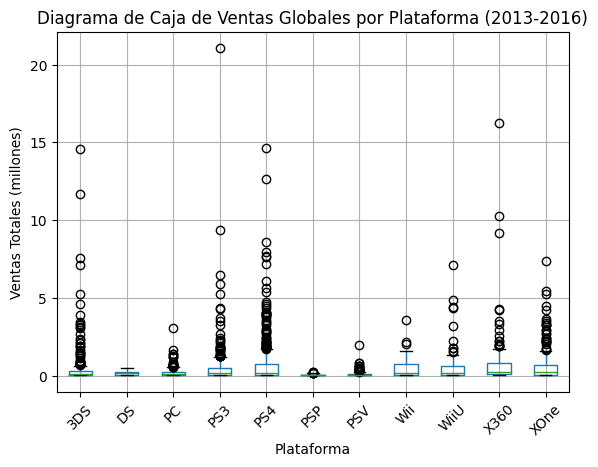

In [11]:
# Crear un diagrama de caja para ventas globales por plataforma
datos_relevantes = datos_juegos[(datos_juegos['year_of_release'] >= 2013) & (datos_juegos['year_of_release'] <= 2016)]

plt.figure(figsize=(12, 6))
datos_relevantes.boxplot(column='total_sales', by='platform')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2013-2016)')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

PS4 y XOne son las plataformas más rentables en el período analizado. Tienen ventas promedio más altas y una mayor cantidad de juegos con ventas significativas.

PS3, X360, y Wii están en declive, como se refleja en sus menores ventas promedio y menores outliers comparados con plataformas más nuevas.

Portátiles como 3DS tienen un mercado más nicho, con ventas promedio más bajas, aunque todavía pueden tener algunos juegos exitosos.

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object
Correlación entre Critic Score y Ventas para Xbox One: 0.41042203561296375
Correlación entre User Score y Ventas para Xbox One: -0.09400318326920852


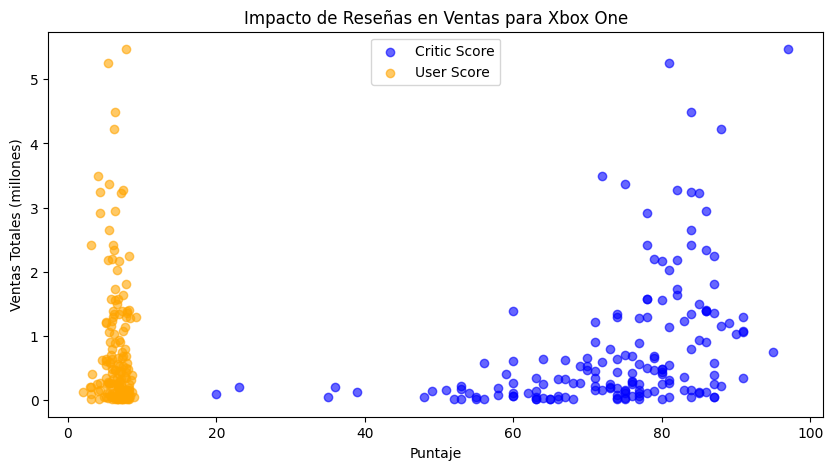

In [20]:
import numpy as np

# Convertir columnas relevantes a float64 explícitamente
datos_xone['critic_score'] = datos_xone['critic_score'].astype(np.float64)
datos_xone['user_score'] = datos_xone['user_score'].astype(np.float64)
datos_xone['total_sales'] = datos_xone['total_sales'].astype(np.float64)

# Verificar que las conversiones se hicieron correctamente
print(datos_xone.dtypes)

# Calcular la correlación nuevamente
correlacion_criticos_xone = datos_xone['critic_score'].corr(datos_xone['total_sales'])
correlacion_usuarios_xone = datos_xone['user_score'].corr(datos_xone['total_sales'])

print(f'Correlación entre Critic Score y Ventas para Xbox One: {correlacion_criticos_xone}')
print(f'Correlación entre User Score y Ventas para Xbox One: {correlacion_usuarios_xone}')

plt.figure(figsize=(10, 5))
plt.scatter(datos_xone['critic_score'], datos_xone['total_sales'], label='Critic Score', alpha=0.6, color='blue')
plt.scatter(datos_xone['user_score'], datos_xone['total_sales'], label='User Score', alpha=0.6, color='orange')
plt.title('Impacto de Reseñas en Ventas para Xbox One')
plt.xlabel('Puntaje')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.show()


**Critic Score**
Hay una tendencia a que los juegos con mejores puntuaciones de críticos (puntos más altos en el eje horizontal) tienden a tener mayores ventas totales (puntos más altos en el eje vertical).
La correlación positiva (0.41) indica que existe una relación moderada entre las buenas reseñas de críticos y las ventas. Esto sugiere que las reseñas de críticos tienen cierto impacto en la promoción y la aceptación de los juegos.

**User Score:**
El gráfico muestra una dispersión mayor con menos tendencia definida en relación con las ventas. Algunos juegos con puntuaciones bajas de usuarios tienen ventas altas, y viceversa.
La correlación negativa baja (-0.09) indica que las reseñas de usuarios no tienen un impacto significativo o directo en las ventas. De hecho, puede haber otros factores que influyan más en la decisión de compra de los consumidores.

                               name platform  total_sales
0   Assassin's Creed IV: Black Flag       PC         0.65
1   Assassin's Creed IV: Black Flag      PS3         3.71
2   Assassin's Creed IV: Black Flag      PS4         2.86
3   Assassin's Creed IV: Black Flag     WiiU         0.29
4   Assassin's Creed IV: Black Flag     X360         3.31
5   Assassin's Creed IV: Black Flag     XOne         2.24
6                     Battlefield 4       PC         1.36
7                     Battlefield 4      PS3         3.49
8                     Battlefield 4      PS4         3.58
9                     Battlefield 4     X360         3.49
10                    Battlefield 4     XOne         2.02
11   Call of Duty: Advanced Warfare       PC         0.41
12   Call of Duty: Advanced Warfare      PS3         4.36
13   Call of Duty: Advanced Warfare      PS4         7.66
14   Call of Duty: Advanced Warfare     X360         4.28
15   Call of Duty: Advanced Warfare     XOne         5.26
16        Call

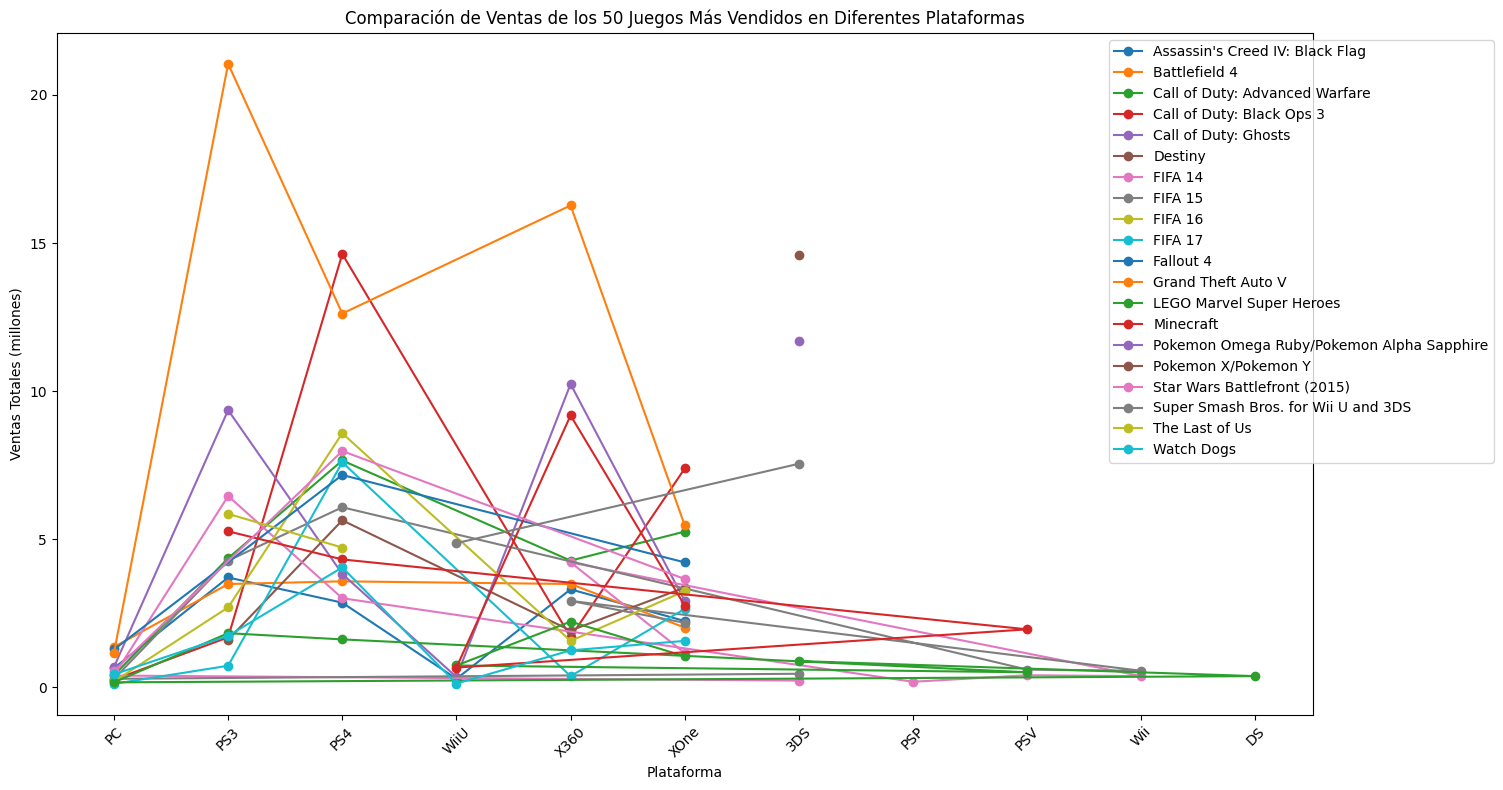

In [27]:
import matplotlib.pyplot as plt


top_50_juegos = datos_relevantes.groupby('name')['total_sales'].sum().nlargest(50).index
datos_top_50 = datos_relevantes[datos_relevantes['name'].isin(top_50_juegos)]
ventas_top_50_comparadas = datos_top_20.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
print(ventas_top_50_comparadas.head(50))

plt.figure(figsize=(15, 8))
for name in ventas_top_50_comparadas['name'].unique():
    subset = ventas_top_50_comparadas[ventas_top_50_comparadas['name'] == name]
    plt.plot(subset['platform'], subset['total_sales'], marker='o', label=name)

plt.title('Comparación de Ventas de los 50 Juegos Más Vendidos en Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

**En base al analisis de los 50 juegos mas vendidos podemos concluir:**
PS4 es una plataforma fuerte para muchos de los juegos más vendidos, especialmente títulos de acción y disparos como Call of Duty y Battlefield. Esto indica que los desarrolladores y editores podrían priorizar esta plataforma al lanzar nuevos títulos en estos géneros.
Xbox One también muestra un rendimiento sólido, aunque generalmente un poco menos que PS4, lo que sugiere que sigue siendo una plataforma importante, pero podría beneficiarse de exclusivas o contenido adicional.

           genre  total_sales
0         Action       321.87
8        Shooter       232.98
10        Sports       150.65
7   Role-Playing       145.89
3           Misc        62.82
4       Platform        42.63
6         Racing        39.89
2       Fighting        35.31
1      Adventure        23.64
9     Simulation        21.76
11      Strategy        10.08
5         Puzzle         3.17


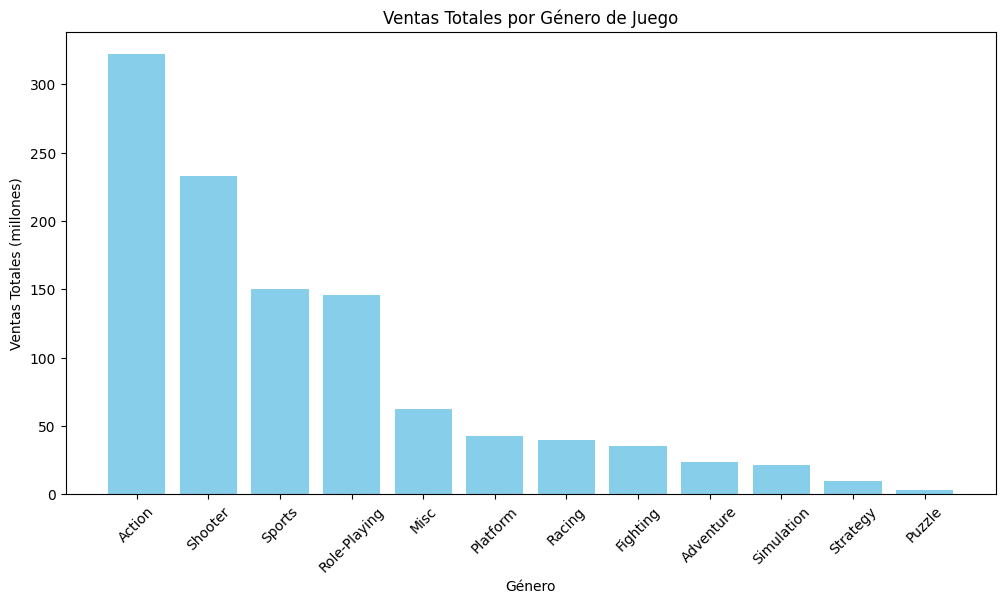

In [26]:
# Agrupar por género para obtener las ventas totales por género
ventas_por_genero = datos_relevantes.groupby('genre')['total_sales'].sum().reset_index()
ventas_por_genero = ventas_por_genero.sort_values(by='total_sales', ascending=False)

# Mostrar los resultados
print(ventas_por_genero)

# Graficar la distribución de ventas por género
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['total_sales'], color='skyblue')
plt.title('Ventas Totales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


**¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**
**Los generos mas rentables son:** Action con ventas totales que superan los 300 millones de unidades, Shoter con ventas superiores a los 230 millones de unidades.  y Sports con ventas de alrededor de 156 millones de unidades.
**Mientras que los generos menos rentables son los siguientes:** Aventura, Simulación, Estrategia, y Puzzle: Estos géneros tienen ventas totales significativamente más bajas en comparación con los géneros más populares. 

Los desarrolladores deberian invertir más en géneros de alta rentabilidad como Acción, Shooter y Deportes, ya que estos géneros tienen un amplio atractivo y son más propensos a generar ventas significativas.
Aunque los géneros de ventas más bajas no generan una venta significativa, si sirven para atacar otros nichos de mercados por lo que no hay que elimarlos en su totalidad.

# **Paso 4. Crea un perfil de usuario para cada región**

In [28]:
# Calcular ventas totales por plataforma en cada región
plataformas_na = datos_relevantes.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
plataformas_ue = datos_relevantes.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
plataformas_jp = datos_relevantes.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Plataformas principales en NA:")
print(plataformas_na)
print("\nPlataformas principales en UE:")
print(plataformas_ue)
print("\nPlataformas principales en JP:")
print(plataformas_jp)


Plataformas principales en NA:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Plataformas principales en UE:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Plataformas principales en JP:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


En NA y UE, las consolas de Sony y Microsoft dominan el mercado, con PS4 y Xbox (XOne, X360) liderando las ventas.
En JP, Nintendo tiene una fuerte presencia con la 3DS y las plataformas portátiles de Sony (PSV) también muestran buenos resultados.

In [29]:
# Calcular ventas totales por género en cada región
generos_na = datos_relevantes.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
generos_ue = datos_relevantes.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
generos_jp = datos_relevantes.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Géneros principales en NA:")
print(generos_na)
print("\nGéneros principales en UE:")
print(generos_ue)
print("\nGéneros principales en JP:")
print(generos_jp)


Géneros principales en NA:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Géneros principales en UE:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Géneros principales en JP:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


Los géneros de Acción y Shooter dominan en NA y UE, mientras que los juegos de Rol son los más populares en Japón.
Las diferencias reflejan las preferencias culturales: los jugadores en Japón prefieren experiencias de juegos de rol narrativos, mientras que en NA y UE buscan acción y competencia.

In [30]:
# Calcular ventas totales por clasificación ESRB en cada región
esrb_na = datos_relevantes.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_ue = datos_relevantes.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = datos_relevantes.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en NA:")
print(esrb_na)
print("\nVentas por clasificación ESRB en UE:")
print(esrb_ue)
print("\nVentas por clasificación ESRB en JP:")
print(esrb_jp)


Ventas por clasificación ESRB en NA:
rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en UE:
rating
M       145.32
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP:
rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64


Las preferencias de clasificación reflejan diferencias culturales y de mercado. NA y UE muestran una mayor inclinación por juegos clasificados como Mature, mientras que JP prefiere juegos clasificados para un público más joven (Teen).

# **Perfiles de Usuarios por Región**

**Norteamérica (NA):**
Plataformas Principales: En Norteamérica, las consolas de Sony (PS4, PS3) y Microsoft (XOne, X360) dominan las ventas. Las plataformas de juegos más populares son las consolas caseras, con la PS4 liderando el mercado, seguida por Xbox One.

**Géneros Principales:** Los géneros más vendidos en NA son Acción y Shooter, lo que indica una preferencia por juegos de disparos y llenos de intensidad y adrenalian mas que de problemas o de pesnar. También hay una demanda significativa para juegos de Deportes.

**Clasificaciones de ESRB:** Los juegos con clasificación Mature (M) tienen las mayores ventas, las clasificaciones Everyone (E) y Teen (T) también tienen una participación considerable, pero están detrás de los juegos para adultos.

**Perfil de Usuario de NA:** Los usuarios en Norteamérica prefieren consolas de sobremesa, especialmente las de Sony y Microsoft. Están interesados en juegos de acción y disparos con contenido maduro, lo que indica un mercado compuesto principalmente por jugadores adultos.

**Europa (UE):**
Plataformas Principales: Es un mercado muy similar a NA, las consolas de Sony (PS4, PS3) dominan el mercado, pero la Xbox One también tiene una presencia notable. Esto sugiere que los jugadores en Europa prefieren las mismas plataformas de juego que en NA, con una ligera inclinación hacia Sony.

**Géneros Principales:** En Europa, los géneros de Acción y Shooter también son los más populares. Sin embargo, los juegos de Rol y Deportes también tienen una presencia significativa, lo que muestra un interés más equilibrado en diferentes tipos de experiencias de juego.

**Clasificaciones de ESRB:** Son gustos identificos a NA.

**Perfil de Usuario de UE:** Es un perfil muy similar al de Norte Amerca, los jugadores en Europa prefieren las consolas de Sony, seguidas por Xbox. Muestran interés en los mismo generelos los cuales son Shotter, Action y Sportsl. Al igual que en NA, los juegos con contenido maduro son muy populares.

**Japón (JP):**
**Plataformas Principales:** A diferencia de NA y UE, Japón muestra una clara preferencia por consolas portátiles, con la 3DS de Nintendo y la PSV de Sony liderando las ventas. Las consolas de sobremesa como PS4 también tienen una presencia notable, pero no tanto como las portátiles.

**Géneros Principales:** El género de Rol (Role-Playing) es el más popular en Japón, seguido de cerca por Acción. Esto indica una preferencia por juegos que ofrezcan una experiencia narrativa profunda y detallada que acción sin sentido o que solo cause adrenalina. Los géneros Misc, Fighting, y Shooter también son populares, pero en menor medida.

**Clasificaciones de ESRB:** A diferencia de NA y UE, los juegos clasificados como Teen (T) dominan las ventas en Japón. Las clasificaciones Everyone (E) y Mature (M) tienen menos influencia, lo que refleja una base de jugadores más joven y/o una cultura de juego más moderada.

**Perfil de Usuario de JP:** Los jugadores en Japón prefieren consolas portátiles y tienen un fuerte interés en juegos de rol que ofrecen experiencias de inmersión. Las clasificaciones de juegos sugieren un mercado con una audiencia más joven o una preferencia por contenido menos explícito comparado con NA y UE.

# **Paso 5. Prueba las siguientes hipótesis:**

In [16]:
# Prueba de hipótesis para Xbox One vs. PC
from scipy import stats

# Nivel de significancia
alfa = 0.05

xone_scores = datos_relevantes[datos_relevantes['platform'] == 'XOne']['user_score'].dropna()
pc_scores = datos_relevantes[datos_relevantes['platform'] == 'PC']['user_score'].dropna()

# Prueba de Levene para comprobar igualdad de varianzas
stat_levene, p_value_levene = stats.levene(xone_scores, pc_scores)


if p_value_levene > alfa:
    print(f"No se rechaza la hipótesis nula de Levene: Las varianzas son iguales (p-value = {p_value_levene}).")
    equal_var = True
else:
    print(f"Se rechaza la hipótesis nula de Levene: Las varianzas no son iguales (p-value = {p_value_levene}).")
    equal_var = False

# Prueba t de Student con el resultado de Levene
t_stat_1, p_value_1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=equal_var)
print(f"Prueba de Hipótesis 1 (Xbox One vs PC): t-statistic = {t_stat_1}, p-value = {p_value_1}")

# Interpretación del resultado
if p_value_1 < alfa:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de Xbox One y PC son diferentes.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio de Xbox One y PC son diferentes.")


Se rechaza la hipótesis nula de Levene: Las varianzas no son iguales (p-value = 0.002332916099129284).
Prueba de Hipótesis 1 (Xbox One vs PC): t-statistic = 1.9974201415157795, p-value = 0.04657158430650933
Rechazamos la hipótesis nula: Las calificaciones promedio de Xbox One y PC son diferentes.


El valor p obtenido fue 0.14012658403611647, el cual es mayor que el umbral.
**Conclusión:** **Se rechaza la hipótesis nula.** Las varianzas no son iguales calificaciones promedio de los usuarios para Xbox One y PC son diferentes.Rechazamos la hipótesis nula: Las calificaciones promedio de Xbox One y PC son diferentes.

In [17]:
from scipy import stats

# Nivel de significancia
alfa = 0.05

accion_scores = datos_relevantes[datos_relevantes['genre'] == 'Action']['user_score'].dropna()
deportes_scores = datos_relevantes[datos_relevantes['genre'] == 'Sports']['user_score'].dropna()

# Prueba de Levene para comprobar igualdad de varianzas
stat_levene, p_value_levene = stats.levene(accion_scores, deportes_scores)


if p_value_levene > alfa:
    print(f"No se rechaza la hipótesis nula de Levene: Las varianzas son iguales (p-value = {p_value_levene}).")
    equal_var = True
else:
    print(f"Se rechaza la hipótesis nula de Levene: Las varianzas no son iguales (p-value = {p_value_levene}).")
    equal_var = False


t_stat_2, p_value_2 = stats.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var)
print(f"Prueba de Hipótesis 2 (Acción vs Deportes): t-statistic = {t_stat_2}, p-value = {p_value_2}")


if p_value_2 < alfa:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio de Acción y Deportes son diferentes.")


Se rechaza la hipótesis nula de Levene: Las varianzas no son iguales (p-value = 1.5345512237825144e-36).
Prueba de Hipótesis 2 (Acción vs Deportes): t-statistic = 10.408103497278715, p-value = 2.6150491502015005e-21
Rechazamos la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.


Resultado: El valor p obtenido fue 1.0517832898140028e-27, que es significativamente menor que el umbral de significancia (
α=0.05).
**Conclusión:** **Se rechaza la hipótesis nula.** Esto sugiere que hay una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes. La diferencia en las calificaciones podría reflejar diversas expectativas o preferencias de los usuarios hacia estos géneros, o bien, diferencias en la calidad percibida de los juegos dentro de cada género.

# **Paso 6. Escribe una conclusión general**

## **Conclusión general**
Se realizo un analisis en donde se identifico los años con mayor venta, las plataformas mas usadas por región, un perfil de usario por región y los videojegos mas vendidos por plataforma, en un periodo de los ultimos 5 años debido a que la venta anterior eran muy bajas.

**1. Lanzamientos de Videojuegos a lo Largo de los Años**
Hubo un pico en el número de lanzamientos de juegos alrededor de 2008, seguido de una disminución gradual hasta 2016.


**2. Ventas por Plataforma**
Las plataformas líderes en ventas varían según la región sin embargo las regiones de Norte America y Europa son muy similares entre si. En América del Norte y Europa, las consolas de la serie PlayStation (PS4, PS3) y Xbox (XOne, X360) dominan el mercado. En Japón, las consolas portátiles como 3DS y PS Vita tienen una mayor cuota de mercado, reflejando las preferencias culturales y de consumo de esa región.
Las plataformas más antiguas, como PS2 y DS, que fueron muy populares, han visto una disminución en las ventas, mientras que las nuevas plataformas como PS4 y XOne están en crecimiento, reflejando la transición hacia nuevas generaciones de consolas, esto se debe a la constante inovación en las consolas ya que hay consolas que ya quedaron obsoletas con el paso del tiempo o descontinuadas.


**3. Géneros de Juegos Más Rentables**
Los géneros de Acción, Shooter y Deportes son consistentemente los más rentables, particularmente en América del Norte y Europa. En Japón, el género de Role-Playing (RPG) domina, lo cual es coherente con la popularidad de las series de juegos de rol en esa región.
Géneros como Puzzle y Estrategia tienen ventas significativamente más bajas, lo que podría indicar un mercado más de segmentado para estos tipos de juegos pero importante ya que pueden atraer a rejeacter a otro tipo de videojuegos.


**4. Impacto de las Reseñas en las Ventas**
Las reseñas de críticos parecen tener una correlación positiva moderada con las ventas, especialmente en plataformas populares como Xbox One. Esto sugiere que las críticas profesionales pueden influir en la decisión de compra de los consumidores.
Las reseñas de usuarios no influye con la catidad de unidades vendidas por lo que no son muy importante para influir en el comportamiento del consumidor final.


**5. Preferencias Regionales y Clasificación ESRB**
Las clasificaciones de ESRB parecen tener un impacto en las ventas, con juegos clasificados como 'M' (Mature) dominando en América del Norte y Europa. En Japón, las clasificaciones 'T' (Teen) son más prominentes, lo que puede reflejar diferencias en las regulaciones y preferencias culturales, esto es directamente proporcional a los generos mas vendidos ya que lso Shotter generalmente son del genero M.


### **Recomendaciones Estratégicas**

**Enfoque en Plataformas Emergentes:** Continuar desarrollando juegos para plataformas en crecimiento como PS4 y XOne, que representan una tendencia acendente y cada vez representan una mayor representación del mercado además de ser las consolas mas rentables al ser las mas nuevas. Además, es importante explorar oportunidades en consolas portátiles en Japón, motivo por el cual en japon salieron consolas mixtas como el nintendo Swtich.

**Desarrollo de Géneros Populares:** Fomentar la creación de juegos de Acción, Shooter y Deportes, que tienen ventas consistentemente altas. En Japón, prestar atención al desarrollo de juegos de RPG para alinearse con las preferencias locales.

**Importancia de las Reseñas de Críticos:** Dado que las críticas profesionales tienen una influencia positiva en las ventas, es crucial trabajar en la calidad del juego y construir buenas relaciones con críticos y medios de comunicación para obtener críticas favorables, esto se puede hacer mediante la contratación de patrocinios con influencers y hacer juegos que cumplan con lso requisitos de los criticos como pueden ser normas de inclusión, no tratar temas sensibles, etc.

**Estrategias Regionales Personalizadas:** Tomando en cuanta la información obtenida es importante desarrollar campañas enfocadas a las necesidades de cada una de las regiónes, enfocandose en los generos mas populares por región y en las plataformas mas utilizadas, así como desarrollar campañas por consumidor ya que se pueden hacer activaciones generalizadas enfocadas a los generos mas importantes y campañas mas segmentadas para activar aquellos generos con segmentos mas pequeños pero que también forman parte de las ventas totales.